# Salary classification of an adult whether he will get salary > 50k or <50k 


In [80]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline


# Data

In [13]:
data = pd.read_csv('E:\\Datasets\\Adult_salary classfication.csv')
# convert the labels into numbers 0 & 1 for fitting the model and storing it in seperate variable 
data.Salary.replace(to_replace=[' >50K', ' <=50K'], value=[0, 1],inplace = True)


In [14]:
#removing special charater ? from the data set
data['Workclass'].replace(to_replace = ' ?',value= np.nan,inplace=True)


In [18]:
# dropping unnecessary columns
data1 = data
data1.drop(['finalwgt','cg','cl'],axis = 1,inplace=True)



In [26]:
# dropping null values
data1.dropna(inplace = True)

In [27]:
#creating two data sets for categorical and continous variables and dropping the label 
x1 =  data1.loc[:,data1.dtypes==np.object]
x2 = data1.loc[:,data1.dtypes==np.int64]
salary_yy = x2.Salary
x2.drop(['Salary'],axis = 1,inplace = True)
x2_columns = x2.columns
x2_columns

E:\APYTHON\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Age', 'Educationalno', 'hours-per-week'], dtype='object')

In [31]:
#scaling the continous variable and creating dummies for categorical variables
sc = StandardScaler()
sc_x2 = pd.DataFrame(sc.fit_transform(x2),columns=x2_columns)
dm_x1 = pd.get_dummies(x1)
type(dm_x1)
type(sc_x2)
dm_x1.shape
sc_x2.shape
salary_yy.shape

(30725,)

In [33]:
#dropping the indexes as they are creating some nan values while concatenating two dataframes
sc_x2.reset_index(drop=True, inplace=True)
dm_x1.reset_index(drop=True, inplace=True)
fdata = pd.concat([sc_x2,dm_x1],axis =1)
fdata.shape
fdata.tail()

,Age,Educationalno,hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,...,native country_ Portugal,native country_ Puerto-Rico,native country_ Scotland,native country_ South,native country_ Taiwan,native country_ Thailand,native country_ Trinadad&Tobago,native country_ United-States,native country_ Vietnam,native country_ Yugoslavia
30720,-0.871950,0.729828,-0.245801,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30721,0.118945,-0.440830,-0.078956,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30722,1.490953,-0.440830,-0.078956,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30723,-1.253064,-0.440830,-1.747404,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30724,1.033617,-0.440830,-0.078956,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# building the base RFC model with train, test split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(fdata,salary_yy,test_size = 0.25,random_state = 1)

In [42]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(x_train,y_train)

E:\APYTHON\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
y_pred  = model_rfc.predict(x_test)
accu = accuracy_score(y_test,y_pred)
accu

0.8105961989065348

In [ ]:
# By changing the value of random_state , the model accuracy keeps on changing, we need to stablize it more, 
#Use Gridsearch with cv for hyper parameter tuning 

In [47]:
# Now use hyper parameter tuning using grid search and randomized search
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [49]:
print(random_grid)
# Grid search
grid_rfc = GridSearchCV(rfc,random_grid,cv = 10,scoring='accuracy')

{'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]}


In [50]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [53]:
grid_rfc.best_params_
grid_rfc.best_score_

0.8337456060408801

In [55]:
# randomisedsearch cv
random_rfc = RandomizedSearchCV(rfc, random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
random_rfc.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
 

In [56]:
random_rfc.best_score_

0.8336154146595496

# Feature importance

In [75]:
importances = random_rfc.best_estimator_.feature_importances_
importances
feature_list = list(x_train.columns)
#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)
feature_importance

[(0.13177503692395282, 'Age'),
 (0.11373857697574125, 'maritualstatus_ Married-civ-spouse'),
 (0.11240521224267978, 'Educationalno'),
 (0.08770269592061822, 'hours-per-week'),
 (0.07117691508006298, 'relationship_ Husband'),
 (0.04936272096896416, 'maritualstatus_ Never-married'),
 (0.02877875428204385, 'Occupation_ Exec-managerial'),
 (0.022722778602877112, 'relationship_ Not-in-family'),
 (0.02254510659675767, 'Occupation_ Prof-specialty'),
 (0.02170737705261266, 'education_ Bachelors'),
 (0.021574603422602052, 'sex_ Female'),
 (0.019650565560192096, 'education_ Masters'),
 (0.01780750591776589, 'relationship_ Wife'),
 (0.016651500798931577, 'relationship_ Own-child'),
 (0.01500558972252943, 'Occupation_ Other-service'),
 (0.011785633593007407, 'Workclass_ Self-emp-not-inc'),
 (0.011589022173815045, 'education_ HS-grad'),
 (0.011520196969327115, 'maritualstatus_ Divorced'),
 (0.010403267471791385, 'Workclass_ Private'),
 (0.010354211283954298, 'relationship_ Unmarried'),
 (0.01005101

     importance                             feature
0      0.131775                                 Age
1      0.113739  maritualstatus_ Married-civ-spouse
2      0.112405                       Educationalno
3      0.087703                      hours-per-week
4      0.071177               relationship_ Husband
..          ...                                 ...
99     0.000015             Workclass_ Never-worked
100    0.000015            native country_ Honduras
101    0.000010            Occupation_ Armed-Forces
102    0.000006                       Occupation_ ?
103    0.000000  native country_ Holand-Netherlands

[104 rows x 2 columns]


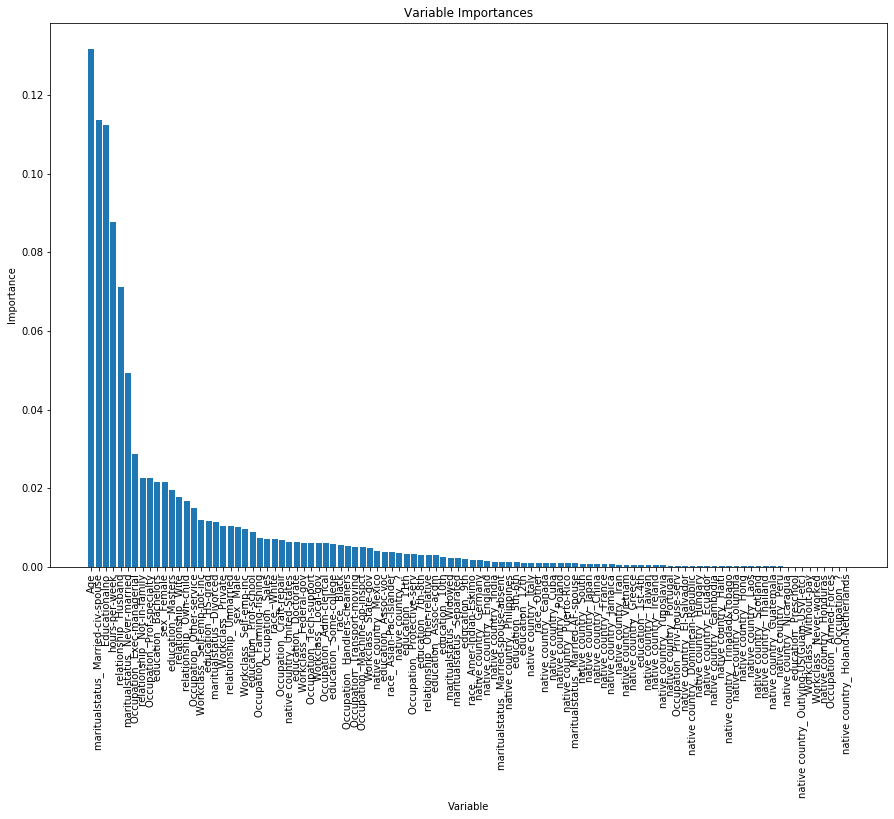

In [82]:
#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
print(df)
x_values = list(range(len(feature_importance)))
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [60]:
# PCA 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = .95) 
  
Xp_train = pca.fit_transform(x_train) 
Xp_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20008029, 0.14918917, 0.12233708, 0.08429481, 0.04063662,
       0.03470494, 0.03015788, 0.02641025, 0.02299963, 0.02240328,
       0.01987813, 0.01851452, 0.01627172, 0.01579898, 0.01500806,
       0.01359865, 0.01248619, 0.01147431, 0.01064022, 0.00982487,
       0.00839307, 0.00759374, 0.00718328, 0.00681001, 0.00613778,
       0.00605923, 0.00581384, 0.00519715, 0.00504612, 0.00482868,
       0.00457136, 0.00454261, 0.0043679 ])

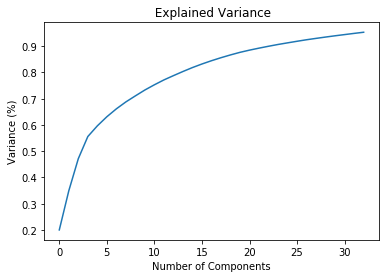

In [64]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title(' Explained Variance')
plt.show()

In [68]:
# retrying again with pca 
random_rfc1 = RandomizedSearchCV(rfc, random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
random_rfc1.fit(Xp_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
 

In [72]:
random_rfc1.best_score_
importances = random_rfc1.best_estimator_.feature_importances_
importances

array([0.19426797, 0.03211944, 0.02100556, 0.04645097, 0.04586902,
       0.03345318, 0.04117601, 0.02071804, 0.02173932, 0.0258718 ,
       0.0290655 , 0.04119817, 0.02187183, 0.01910609, 0.02088695,
       0.01686647, 0.02209791, 0.04766193, 0.01778362, 0.01948159,
       0.01841367, 0.02983584, 0.02363091, 0.01672484, 0.01714233,
       0.01901239, 0.0188468 , 0.01756034, 0.01797252, 0.0285379 ,
       0.01869192, 0.01704822, 0.01789096])